### Fraud Detection Using SVMs and Logistic Regression

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('fraud_data.csv')
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0
5,-0.713266,0.869132,0.330114,0.902275,0.520836,-0.537036,0.301955,0.209117,-0.732441,-0.266402,...,0.114405,0.412489,0.223180,-0.430522,0.109774,-0.274569,-0.108067,-0.075318,4.95,0
6,1.219060,-0.207708,0.782809,0.271655,-0.456658,0.414201,-0.675133,0.057714,0.601970,-0.178378,...,0.170372,0.541010,-0.257175,-0.904534,0.414090,0.653565,0.014583,0.027320,47.65,0
7,0.683918,0.329216,-1.693025,-1.123644,2.662177,3.563731,-0.309291,-0.043369,0.050627,-0.361619,...,1.072188,0.671990,-0.208488,0.735029,0.633444,-0.281231,0.299686,0.293389,1.00,0
8,-1.127820,1.461342,0.526673,-0.158998,0.353158,-1.539196,0.727383,0.299275,-0.778768,-1.662588,...,-0.068002,-0.494914,-0.343489,0.222014,0.541271,0.295158,-0.145161,-0.002592,0.76,0
9,-1.757794,0.821894,2.529482,-0.328198,-0.902062,0.739803,-0.119755,-0.797691,0.739508,3.458517,...,0.028491,0.778325,-0.073034,0.135780,-0.955393,-0.503613,-1.834281,-0.585528,10.00,0


In [3]:
len(df[df['Class'] == 1]) / len(df) # Percentage of fradulent instances

0.016410823768035772

In [4]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
# Use performance of Dummy Classifier as baseline

from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score

dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)
accuracy = dummy.score(X_test, y_test)
recall = recall_score(y_test, y_pred_dummy)

print("Accuracy of Dummy Classifier = {}".format(accuracy))
print("Recall of Dummy Classifier = {}".format(recall))

Accuracy of Dummy Classifier = 0.9852507374631269
Recall of Dummy Classifier = 0.0


In [7]:
# Support Vector Machine - default parameters

from sklearn.metrics import recall_score, precision_score
from sklearn.svm import SVC

clf = SVC(random_state=0, gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print("Accuracy of SVM = {}".format(accuracy))
print("Recall of SVM = {}".format(recall))
print("Precision of SVM = {}".format(precision))

Accuracy of SVM = 0.9907817109144543
Recall of SVM = 0.375
Precision of SVM = 1.0


In [9]:
# Support Vector Machine - {'C': 1e9, 'gamma': 1e-07}

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

THRESHOLD = -220.0
params = {'C': 1e9, 'gamma': 1e-07}
clf = SVC(**params).fit(X_train, y_train)
clf_predictions = clf.decision_function(X_test) > THRESHOLD
conf_matrix = confusion_matrix(y_test, clf_predictions)

accuracy = clf.score(X_test, y_test)
recall = recall_score(y_test, clf_predictions)
precision = precision_score(y_test, clf_predictions)

print("Accuracy of SVM = {}".format(accuracy))
print("Recall of SVM = {}".format(recall))
print("Precision of SVM = {}".format(precision))

conf_matrix

Accuracy of SVM = 0.9963126843657817
Recall of SVM = 0.825
Precision of SVM = 0.7333333333333333


array([[5320,   24],
       [  14,   66]], dtype=int64)

In [14]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
    
clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
y_proba = clf.predict_proba(X_test)[:, 1]
p, r, _ = precision_recall_curve(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)

rec = float(r[np.where(p == 0.75)])
tp_rate = float(tpr[np.where((fpr >= 0.159) & (fpr <= 0.161))][0])

print("Recall of Logistic Regression = {}".format(rec))
print("True Positive Rate of Logistic Regression = {}".format(tp_rate))

Recall of Logistic Regression = 0.825
True Positive Rate of Logistic Regression = 0.9375


In [20]:
# Grid Search on Logistic Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10, 100]}
clf = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid=grid, scoring='recall', cv=3)
clf.fit(X_train, y_train)
result = pd.DataFrame(clf.cv_results_['mean_test_score'].reshape(5, 2))
result.columns = ['l1 Penalty', 'l2 Penalty']
result['C'] = [0.01, 0.1, 1, 10, 100]
result = result.set_index('C')

result

,l1 Penalty,l2 Penalty
C,,
0.01,0.666667,0.760870
0.10,0.800725,0.804348
1.00,0.811594,0.811594
10.00,0.807971,0.811594
100.00,0.807971,0.807971


<IPython.core.display.Javascript object>


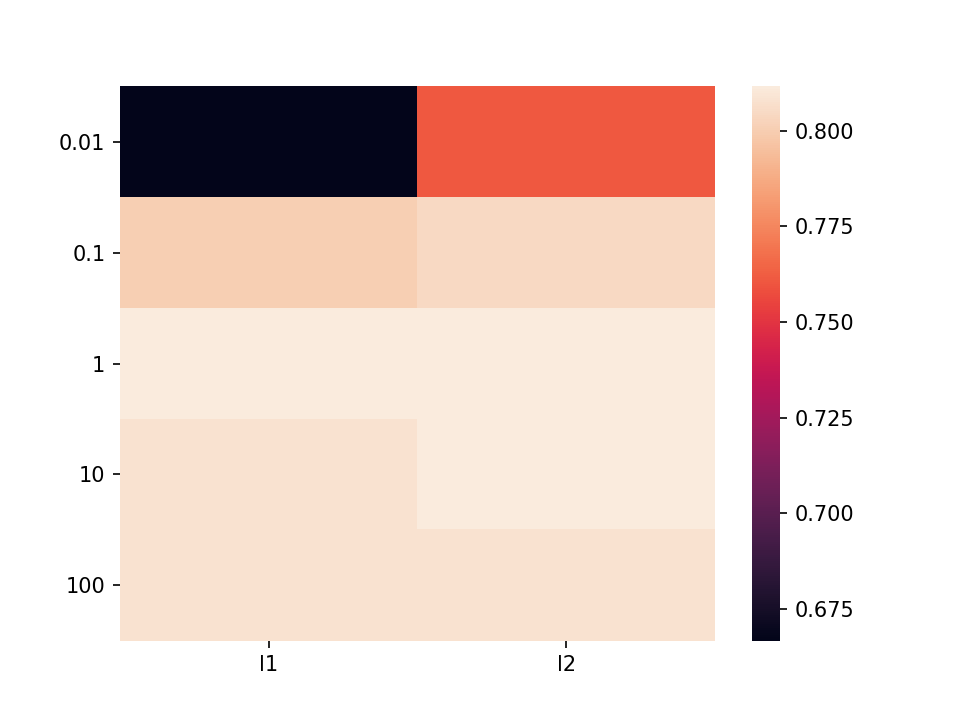

In [21]:
# Grid Search Heat Map to better visualize the results

%matplotlib notebook

import seaborn as sns
import matplotlib.pyplot as plt

scores = pd.DataFrame(clf.cv_results_['mean_test_score'].reshape(5, 2))
plt.figure()
sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
plt.yticks(rotation=0);